# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [707]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Overview

- Observations
- Sanity checks

In [708]:
df = pd.read_csv('used_device_data.csv')

In [709]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 3454 rows and 15 columns


In [710]:
df.sample(10, random_state=2)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
1207        HTC  Android       12.700   no   no           8.000   
143     Samsung  Android       20.320  yes   no           5.000   
3202     Huawei  Android       16.690  yes  yes          10.500   
1127      Honor  Android       10.290   no   no           8.000   
2926     Xiaomi  Android       14.830  yes   no          13.000   
1726         LG  Android        7.670   no   no           2.000   
62      Infinix  Android       15.390  yes   no             nan   
3273       Sony  Android       15.370  yes  yes             nan   
1411     Others   Others       19.940   no   no           5.000   
551     Alcatel  Android       10.290   no   no           5.000   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1207             5.000      32.000 4.000 2100.000 160.000          2014   
143              2.000      16.000 1.500 4200.000 313.000          2015   
3202            16.000     128.000 8.000 4000.000 178.000          2020   
1127             2.000      32.000 4.000 1730.000 159.000          2015   
2926             8.000      64.000 4.000 3000.000 150.000          2018   
1726             1.300      16.000 4.000 1540.000 140.450          2014   
62              16.000      32.000 3.000 4000.000 178.000          2019   
3273             8.000     256.000 8.000 4000.000 181.400          2020   
1411             2.000      32.000 4.000 4450.000 384.000          2014   
551              0.300      16.000 4.000 1800.000 157.000          2013   

      days_used  new_price  used_price  
1207       1044    190.050      70.700  
143         909    210.230      75.650  
3202        221    469.870     128.570  
1127        894     69.980      48.570  
2926        446    169.300     105.800  
1726        952     61.350      29.490  
62          316     99.700      95.130  
3273        236    934.150     240.670  
1411        767    170.810      78.890  
551         921     99.850      51.290

In [711]:
df.duplicated().sum()

0

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [713]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [714]:
df.describe(include="all").T

count unique      top  freq     mean      std      min  \
brand_name           3454     34   Others   502      NaN      NaN      NaN   
os                   3454      4  Android  3214      NaN      NaN      NaN   
screen_size      3454.000    NaN      NaN   NaN   13.713    3.805    5.080   
4g                   3454      2      yes  2335      NaN      NaN      NaN   
5g                   3454      2       no  3302      NaN      NaN      NaN   
main_camera_mp   3275.000    NaN      NaN   NaN    9.460    4.815    0.080   
selfie_camera_mp 3452.000    NaN      NaN   NaN    6.554    6.970    0.000   
int_memory       3450.000    NaN      NaN   NaN   54.573   84.972    0.010   
ram              3450.000    NaN      NaN   NaN    4.036    1.365    0.020   
battery          3448.000    NaN      NaN   NaN 3133.403 1299.683  500.000   
weight           3447.000    NaN      NaN   NaN  182.752   88.413   69.000   
release_year     3454.000    NaN      NaN   NaN 2015.965    2.298 2013.000   
days_used        3454.000    NaN      NaN   NaN  674.870  248.580   91.000   
new_price        3454.000    NaN      NaN   NaN  237.039  194.303   18.200   
used_price       3454.000    NaN      NaN   NaN   92.303   54.702    4.650   

                      25%      50%      75%      max  
brand_name            NaN      NaN      NaN      NaN  
os                    NaN      NaN      NaN      NaN  
screen_size        12.700   12.830   15.340   30.710  
4g                    NaN      NaN      NaN      NaN  
5g                    NaN      NaN      NaN      NaN  
main_camera_mp      5.000    8.000   13.000   48.000  
selfie_camera_mp    2.000    5.000    8.000   32.000  
int_memory         16.000   32.000   64.000 1024.000  
ram                 4.000    4.000    4.000   12.000  
battery          2100.000 3000.000 4000.000 9720.000  
weight            142.000  160.000  185.000  855.000  
release_year     2014.000 2015.500 2018.000 2020.000  
days_used         533.500  690.500  868.750 1094.000  
new_price         120.343  189.785  291.115 2560.200  
used_price         56.483   81.870  116.245  749.520

In [715]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Answers to Questions in EDA

#### Analysis of Used Price Column
1. What does the distribution of used device prices look like?

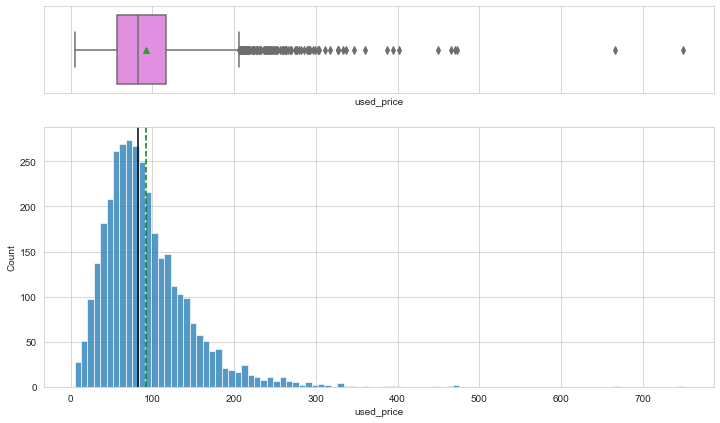

In [716]:
histogram_boxplot(df, "used_price")

**Observations**
* There is a wide dispersion in the data with many outliers on the higher end
* This will be something that is good to add a log scale as we will need this for further analysis later

In [717]:
df['used_price_log'] = np.log(df['used_price'])

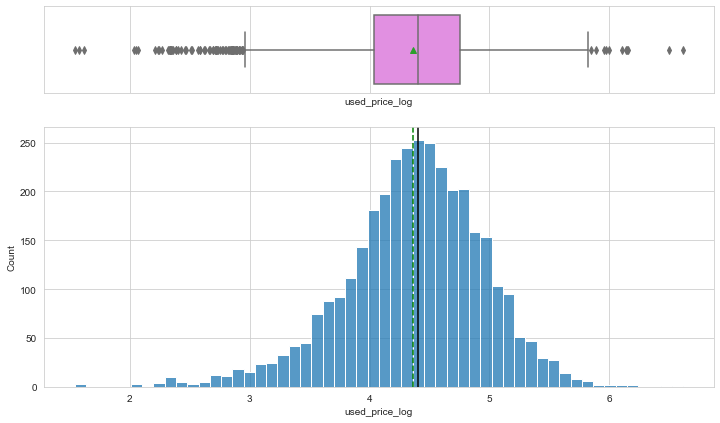

In [718]:
histogram_boxplot(df, "used_price_log")

**Observations**
* With the log, the data is now in a more uniform distribution that we can use

In [719]:
## Reworked this function to allow me to provide my own order and if not then use the default

def labeled_barplot(data, feature, perc=False, n=None, order=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    if order is None:
        order = data[feature].value_counts().index[:n].sort_values()

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order = order)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        
        
    plt.show()  # show the plot

#### Analysis of Operation Systems Column
2. What percentage of the used device market is dominated by Android devices?

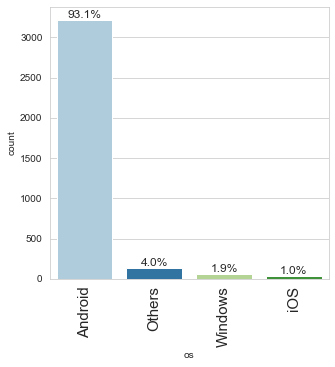

In [720]:
labeled_barplot(df, 'os', perc = True)

**Observations**
* 93% of the used device market is dominated by Android

#### Analysis of Ram and Brand
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [721]:
df['ram'].value_counts()

4.000     2815
6.000      154
8.000      130
2.000       90
0.250       83
3.000       81
1.000       34
0.020       18
12.000      18
0.030       17
0.500        9
1.500        1
Name: ram, dtype: int64

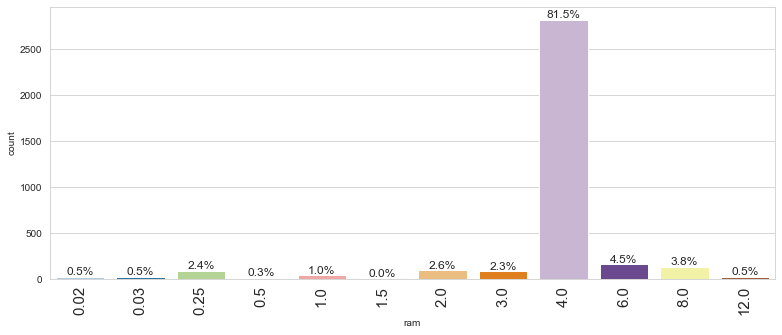

In [722]:
labeled_barplot(df, 'ram', perc = True)

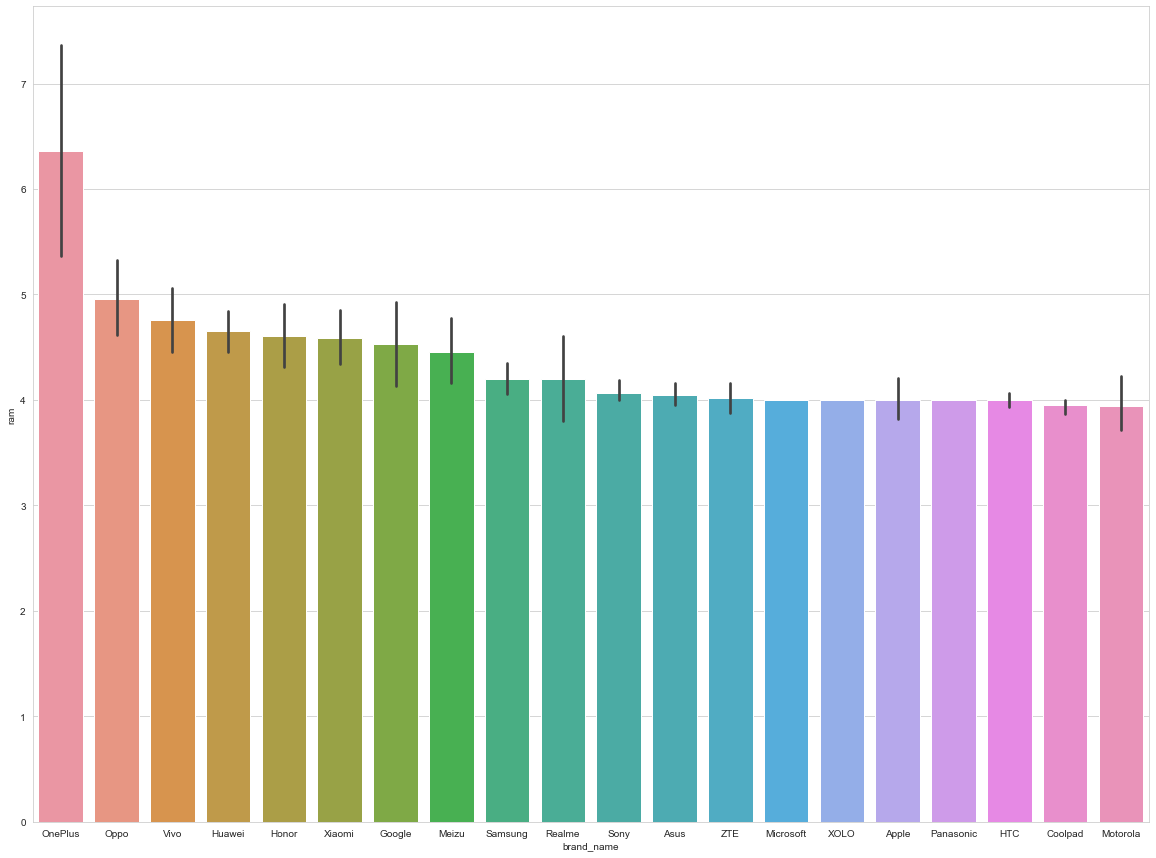

In [723]:
plt.figure(figsize=(20,15))
sns.barplot(data = df, x = 'brand_name', y = 'ram', order = df.groupby(['brand_name'])['ram'].mean().sort_values(ascending=False).iloc[:20].index)
plt.show()

**Observations**
* On average OnePlus has the most RAM in their used phones by a large margin
* Oppo, Vivo, Huawei, Honor are the second through 5 highest RAM
* The most common RAM is 4
* 81% of used phones have a RAM of 4

**Analysis of Weight for Phones with Large Batteries**
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [724]:
large_batteries = df[df['battery'] > 4500]
print(f'There are {large_batteries.shape[0]} devices with a large battery')
print(f'The percentage of device of the total with large batteries is {round(large_batteries.shape[0] / df.shape[0] * 100,2)}%')

There are 341 devices with a large battery
The percentage of device of the total with large batteries is 9.87%


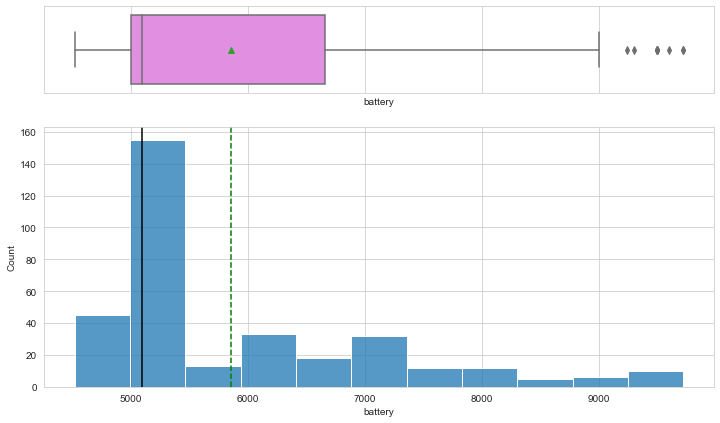

In [725]:
histogram_boxplot(large_batteries, 'battery')

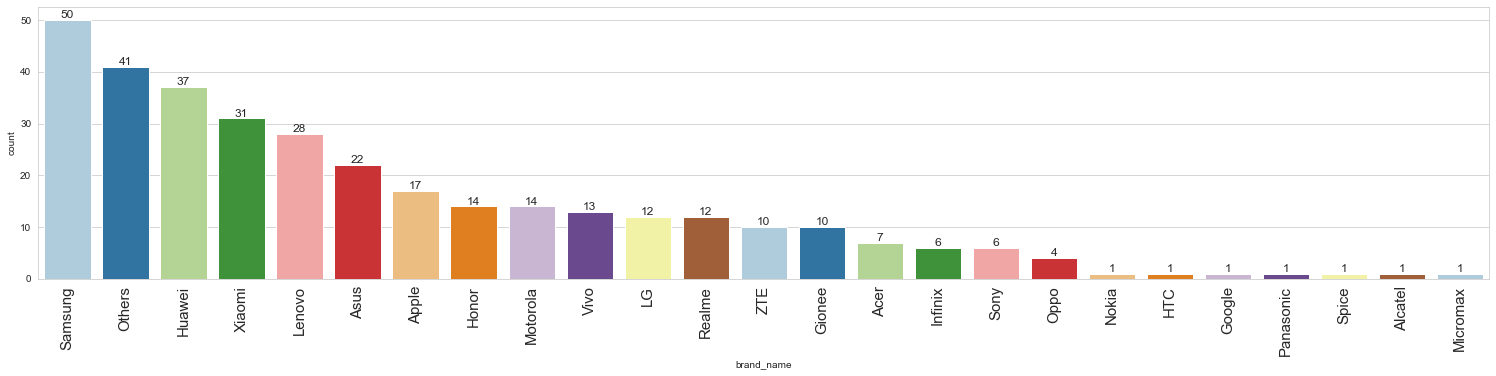

In [726]:
labeled_barplot(large_batteries, 'brand_name', order = large_batteries.groupby('brand_name')['battery'].agg('count').sort_values(ascending=False).index)

**Observations**
* There are 341 devices with large batteries
* Large phones make up 9.87% of the total used devices in the dataset
* Samsung has the most devices with large batteries
* The average large batter is a little over 5,000 mAh

**Analysis of Phones with Larger Screens**
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [727]:
# Create new data frame and add a column for screen size in inches
inches = df.copy()
inches['screen_size_inches'] = inches['screen_size'].apply(lambda x: round(x /2.54,2))
large_device = inches[inches['screen_size_inches'] > 6]

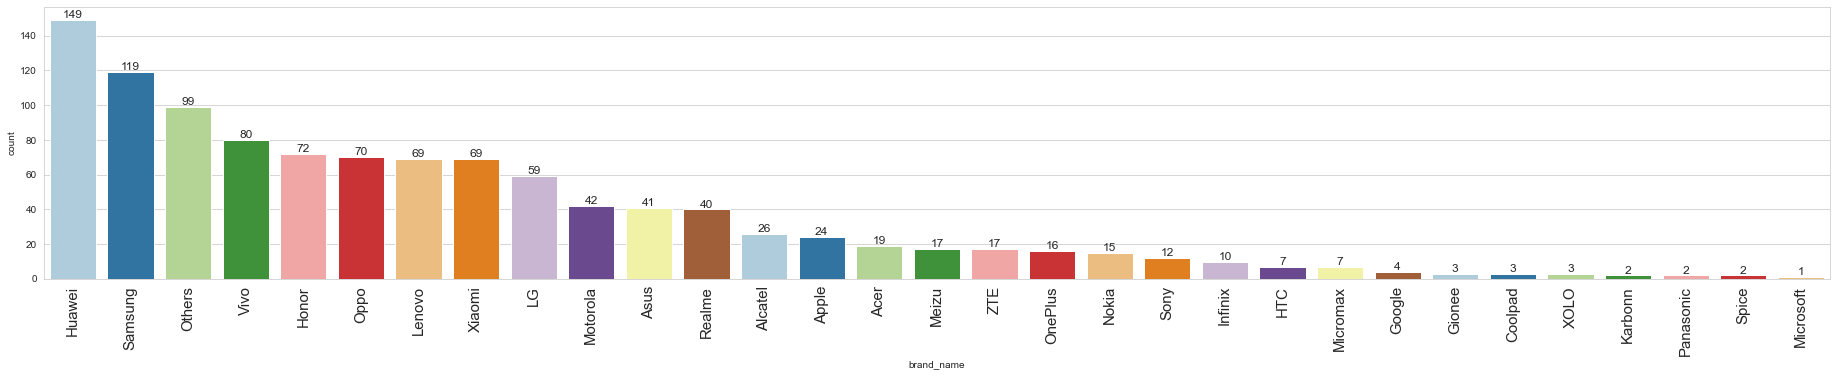

In [728]:
labeled_barplot(large_device, 'brand_name', order = large_device.groupby('brand_name')['screen_size_inches'].agg('count').sort_values(ascending=False).index)

In [729]:
print(f'There are {large_device.shape[0]} devices with large screens')
print(f'The percentage of devices with large screens is {round(large_device.shape[0] / inches.shape[0] * 100,2)}%')

There are 1099 devices with large screens
The percentage of devices with large screens is 31.82%


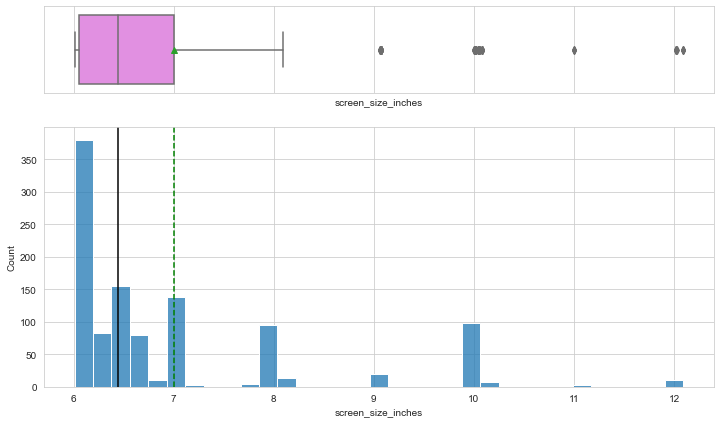

In [730]:
histogram_boxplot(large_device, 'screen_size_inches')

**Observations**
* There are 1099 devices with large screens which makes up 31.82% of the total
* Huawei and Samsung make the most large devices
* There is a wide spread in the data of devices because there is a mix of Smart Phones and Tablets in the data

#### Budget Devices with Great Cameras

6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

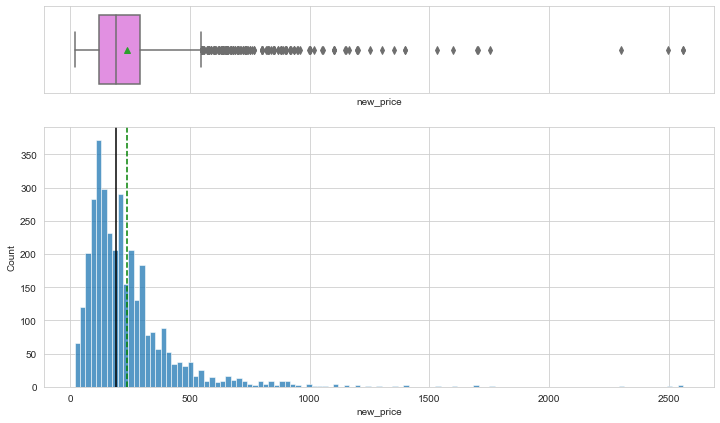

In [731]:
histogram_boxplot(df, 'new_price')

In [732]:
df['new_price'].describe()

count   3454.000
mean     237.039
std      194.303
min       18.200
25%      120.343
50%      189.785
75%      291.115
max     2560.200
Name: new_price, dtype: float64

In [733]:
df['price_category'] = pd.cut(x=df['new_price'],bins=[-np.infty, 200, 400, np.infty],labels=['Budget', 'Mid', 'Premium'])
df['price_category'].value_counts()

Budget     1844
Mid        1188
Premium     422
Name: price_category, dtype: int64

In [734]:
budget_good_camera = df.loc[(df['price_category'] == 'Budget') & (df['selfie_camera_mp'] > 8)]
budget_good_camera.head()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
17      Honor  Android       16.740  yes  no          13.000   
22        HTC  Android       15.290  yes  no          13.000   
41     Huawei  Android       15.900  yes  no          13.000   
48     Huawei  Android       16.740  yes  no          13.000   
62    Infinix  Android       15.390  yes  no             nan   

    selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
17            16.000      64.000 4.000 4000.000 206.000          2019   
22            16.000      32.000 3.000 3850.000 170.000          2019   
41            32.000      64.000 6.000 4000.000 178.000          2019   
48            16.000     128.000 4.000 4000.000 163.500          2019   
62            16.000      32.000 3.000 4000.000 178.000          2019   

    days_used  new_price  used_price  used_price_log price_category  
17        421    180.040     118.750           4.777         Budget  
22        187    180.500      95.660           4.561         Budget  
41        206    199.250     147.900           4.997         Budget  
48        376    190.620     126.380           4.839         Budget  
62        316     99.700      95.130           4.555         Budget

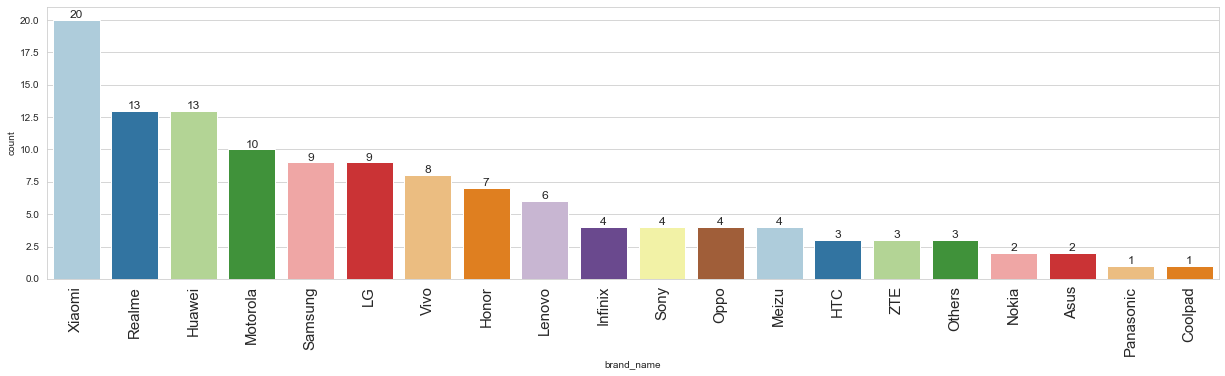

In [735]:
labeled_barplot(budget_good_camera, 'brand_name', order = budget_good_camera.groupby('brand_name')['selfie_camera_mp'].agg('count').sort_values(ascending=False).index)

**Observations**
* There is a wide distribution of the prices
* Used below 200 for a budget device, between 200-400 for Mid device and above 400 for premium
* Xiaomi makes the most budget devices with large camera followed by Realme and Huawei

#### Correlation for Used Device

7. Which attributes are highly correlated with the price of a used device?

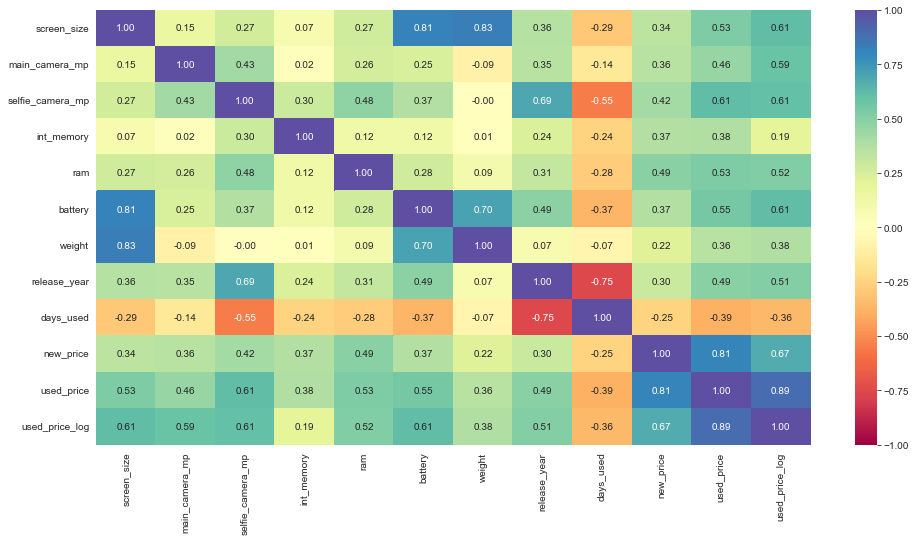

In [736]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* The attributes which are most heavily correlated with the price are: new_price, selfie_camera_mp, battery, ram and screensize
* days_used is negative correlated with used_price which we would expect

## Univariate Analysis

In [737]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       14.500  yes   no          13.000   
1      Honor  Android       17.300  yes  yes          13.000   
2      Honor  Android       16.690  yes  yes          13.000   
3      Honor  Android       25.500  yes  yes          13.000   
4      Honor  Android       15.320  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 3.000 3020.000 146.000          2020   
1            16.000     128.000 8.000 4300.000 213.000          2020   
2             8.000     128.000 8.000 4200.000 213.000          2020   
3             8.000      64.000 6.000 7250.000 480.000          2020   
4             8.000      64.000 3.000 5000.000 185.000          2020   

   days_used  new_price  used_price  used_price_log price_category  
0        127    111.620      74.260           4.308         Budget  
1        325    249.390     174.530           5.162            Mid  
2        162    359.470     165.850           5.111            Mid  
3        345    278.930     169.930           5.135            Mid  
4        293    140.870      80.640           4.390         Budget

#### Analysis of Brand Name

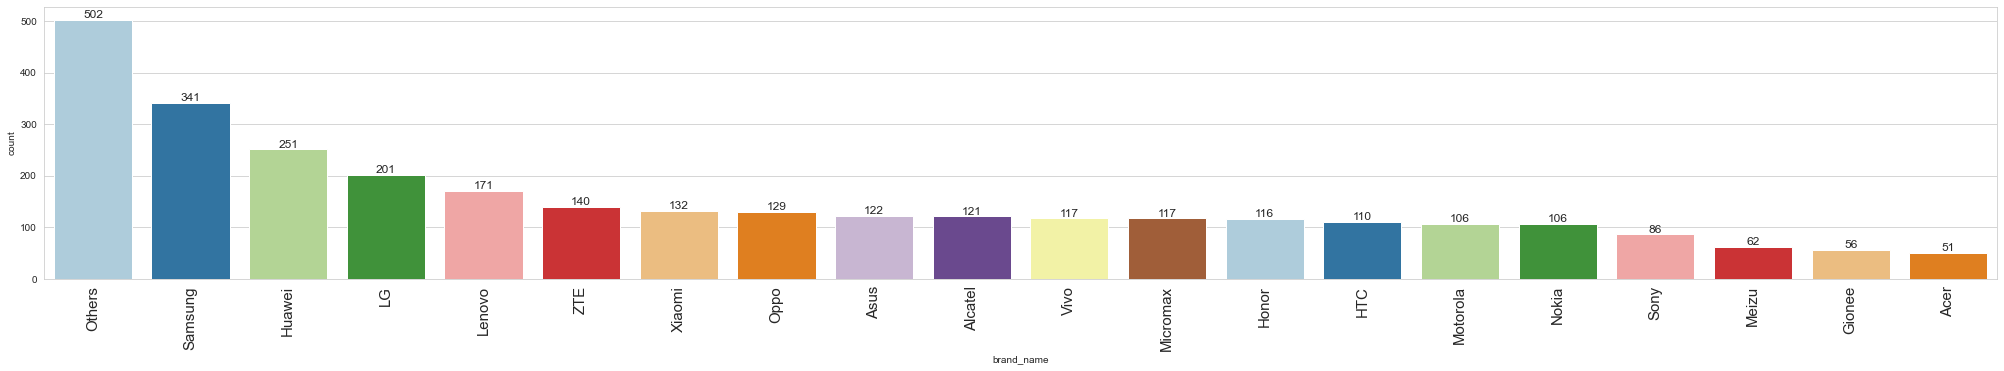

In [738]:
labeled_barplot(df, 'brand_name', order=df.groupby(['brand_name'])['ram'].count().sort_values(ascending=False).iloc[:20].index)

In [739]:
df['brand_name'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Motorola      106
Nokia         106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
OnePlus        22
Microsoft      22
BlackBerry     22
Coolpad        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

**Observations**
* Others has a high value count which makes it tough for analysis since we do not know what brand
* Samsung, Huawei, LG have the highest count of devices 

#### Analysis of OS

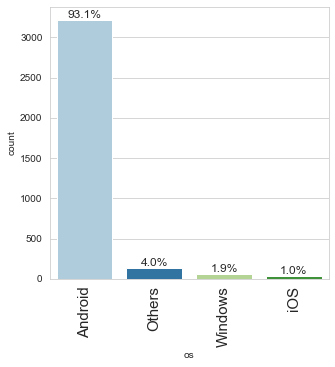

In [740]:
labeled_barplot(df, 'os', perc=True)

**Observations**
* Android dominates the OS market in the devices in the dataset
* Android has 93% of the devices in the dataset

#### Analysis of Screen Size

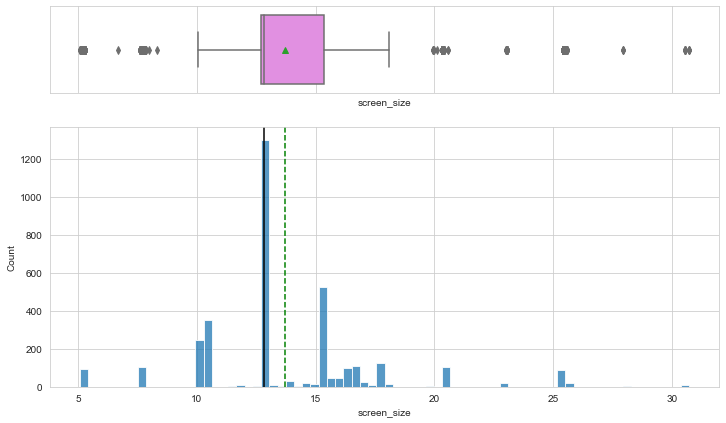

In [741]:
histogram_boxplot(df, 'screen_size')

**Observations**
* The data for screen size has a wide disparity with many data points outside the whiskers of the boxplot on both directions
* Screen size is something that we could potentially look to break into categories

#### Analysis of 4G

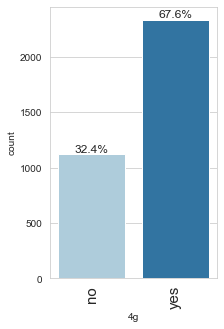

In [742]:
labeled_barplot(df, '4g', perc = True)

**Observations**
* 67.6% of the phones are 4G

#### Analysis of 5G

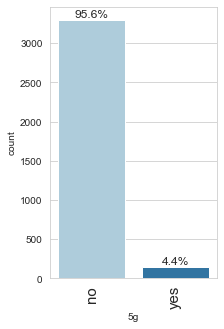

In [743]:
labeled_barplot(df, '5g', perc = True)

**Obversations**
* 4.4% of phones have 5G

#### Analysis of Main Camera

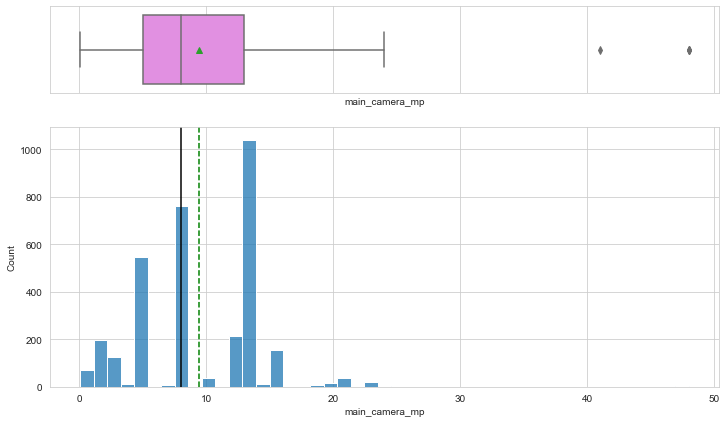

In [744]:
histogram_boxplot(df, 'main_camera_mp')

**Observations**
* There are a few devices which have a large main camera
* The average of devices is just under 10 MP

#### Analysis of Selfie Camera

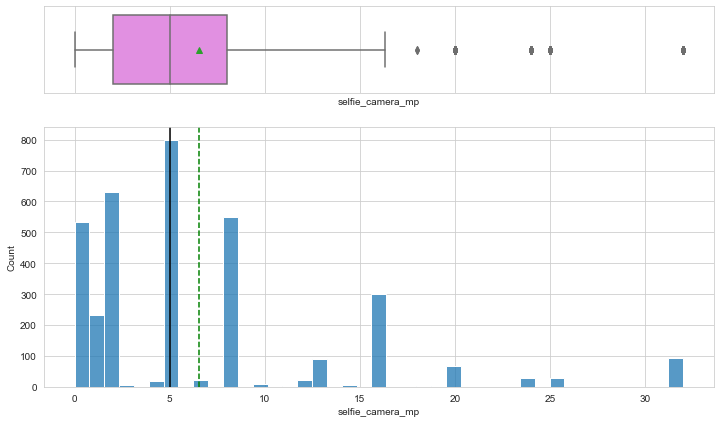

In [745]:
histogram_boxplot(df, 'selfie_camera_mp')

**Obvservations**
* There is a wide distribution of devices with selfie cameras
* There are a few devices with more than 30 MP
* The median is 5 MP

#### Analysis of Memory

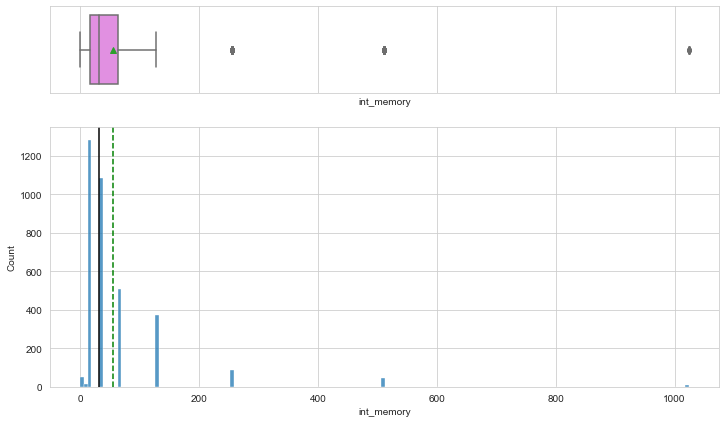

In [746]:
histogram_boxplot(df, 'int_memory')

**Obversations**
* There are a few devices which have a large deal of memory, way above the rest of the data
* These large data points will skew the average higher

#### Analysis of RAM

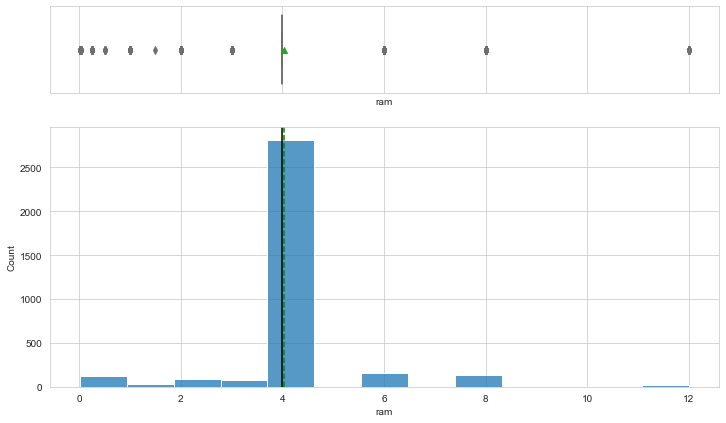

In [747]:
histogram_boxplot(df, 'ram')

**Obversations**
* Most of the RAM is around 4
* There are a few devices which have 11 ram
* The mean and median are very close

#### Analysis of Battery

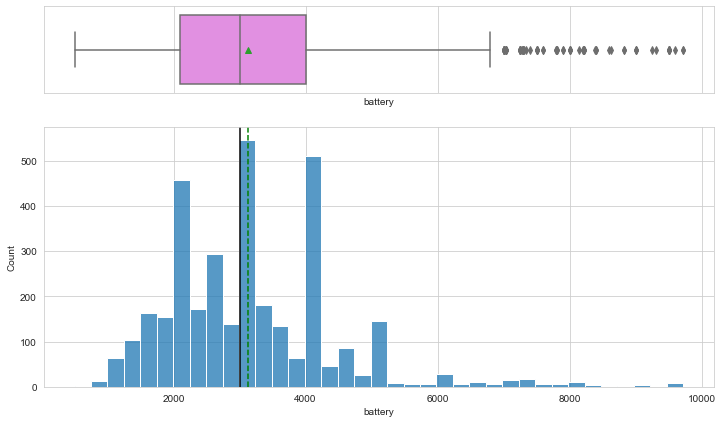

In [748]:
histogram_boxplot(df, 'battery')

**Observations**
* The average battery size is around 3000
* There are some devices which have almost 10000 mAh battery
* There are many devices above the whiskers in the boxplot but none below the whiskers

#### Analysis of Weight

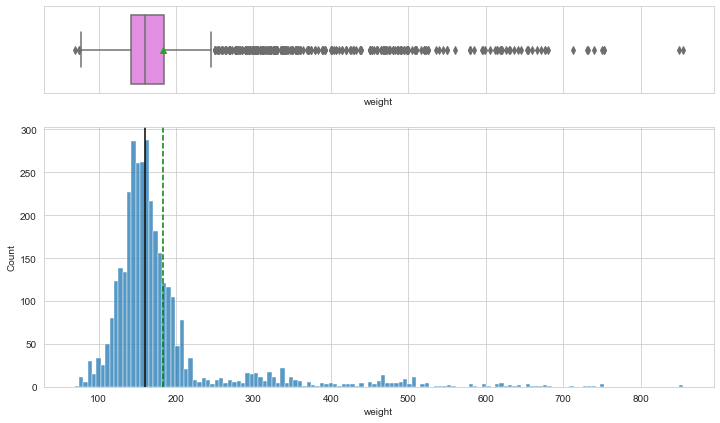

In [749]:
histogram_boxplot(df, 'weight')

**Observation**
* There is a wide disperion in the data for weight with many devices on the large end
* This could be a potential field for us to use a log for better analysis

#### Analysis of Release Year

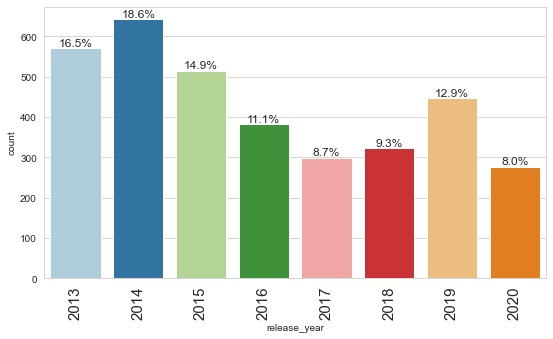

In [750]:
labeled_barplot(df, 'release_year', perc = True)

**Obervations**
* No year is dominating the release year category
* 2014 is the most common year followed by 2013 and 2015

#### Analysis of Days Used

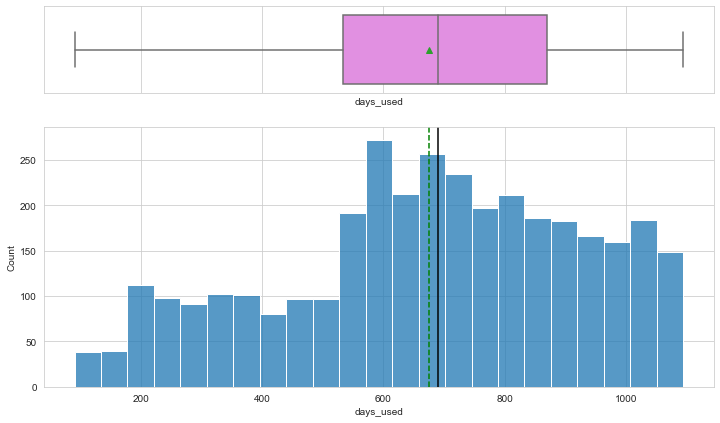

In [751]:
histogram_boxplot(df, 'days_used')

**Observations**
* The data for datas used does not look to have any data points outside the whiskers
* Most data is around the average and median

#### Analysis of New Price

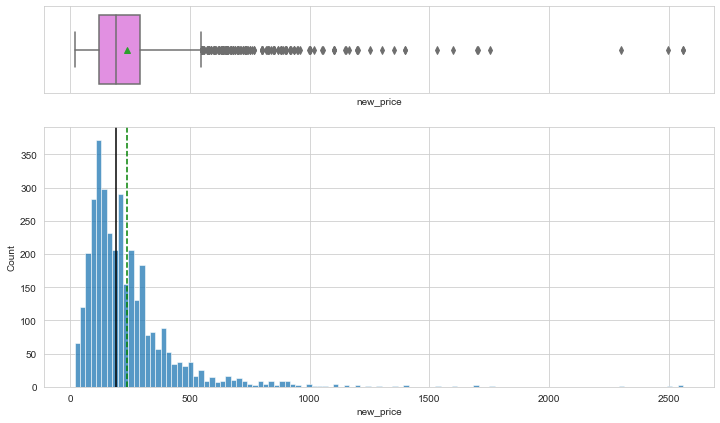

In [752]:
histogram_boxplot(df, 'new_price')

**Obversations**
* Data for New Price has some devices that are much larger than the average
* This is another candidate for a using a log

#### Analysis of Used Price

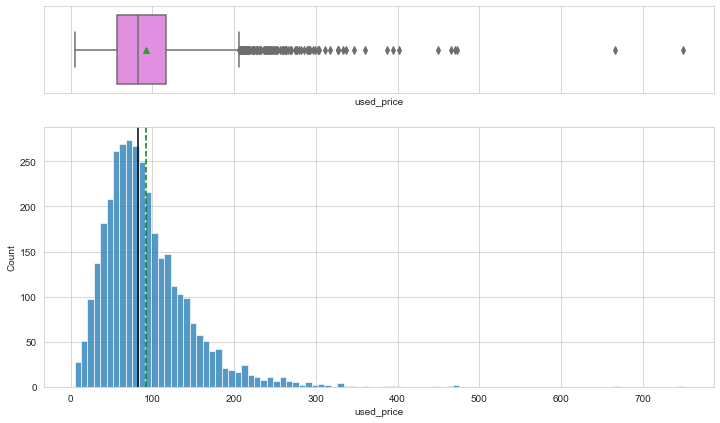

In [753]:
histogram_boxplot(df, 'used_price')

**Observations**
* Similar to New Price, there is a wide dispersion of data for used price
* This is another column that we will want to create a log for

## Bivariate Analysis

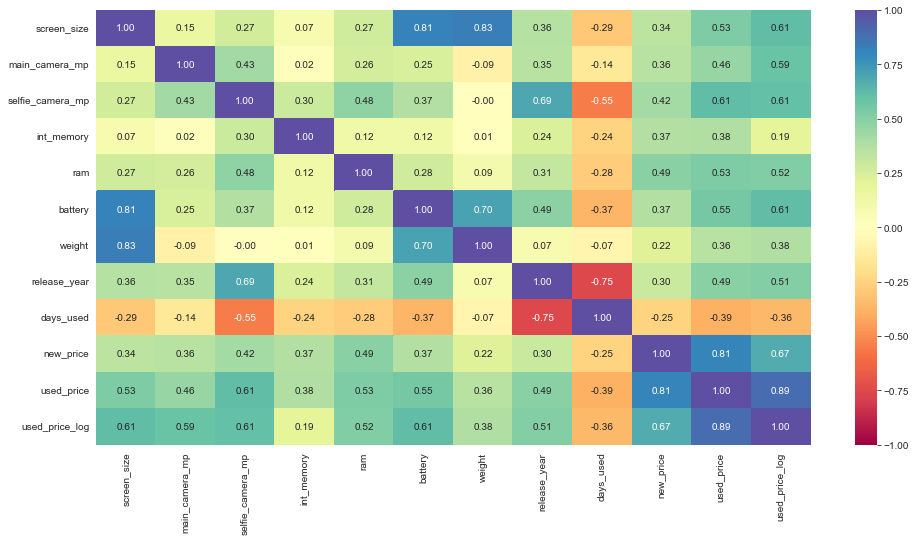

In [754]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Analysis of Brand Name vs Used Price

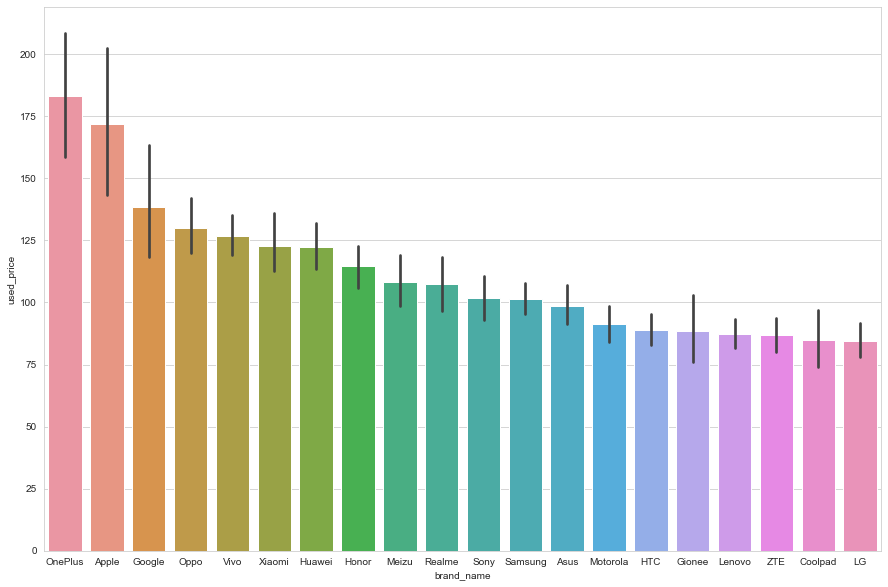

In [755]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'brand_name', y = 'used_price', order = df.groupby(['brand_name'])['used_price'].mean().sort_values(ascending=False).iloc[:20].index)
plt.show()

**Obvervations**
* OnePlus, Apple and Google on average have the most expensive devices by used price

#### Analysis of Brand Name vs Screen Size

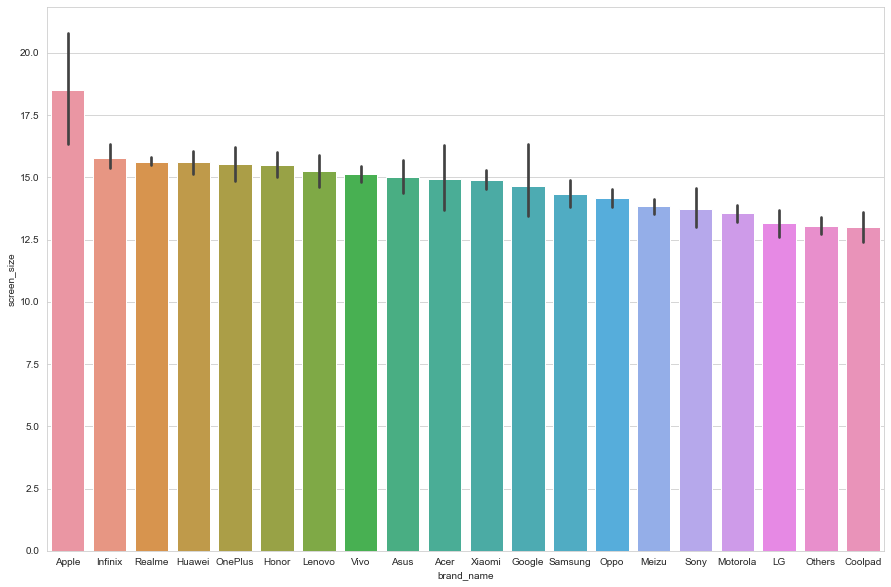

In [756]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'brand_name', y = 'screen_size', order = df.groupby(['brand_name'])['screen_size'].mean().sort_values(ascending=False).iloc[:20].index)
plt.show()

**Observations**
* On average Apple devices have the largest screens followed by Infinix and Realme

#### Analysis of Release Year vs Selfie Camera

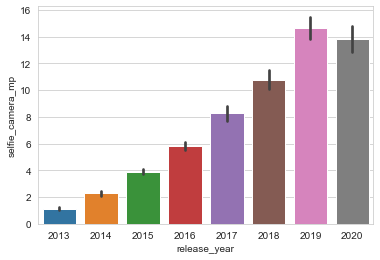

In [757]:
sns.barplot(data = df, x= 'release_year', y='selfie_camera_mp')
plt.show()

**Obversations**
* On average the selfie camera has increase each year except from 2019 to 2020

#### Analysis of Screen Size vs New Price

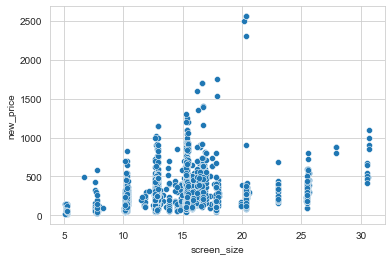

In [758]:
sns.scatterplot(data = df, x = 'screen_size', y = 'new_price')
plt.show()

**Observations**
* There is a positive correlation between Screen Size and New Price
* There are a handful of devices that have large screens, but are cheaper than smaller devices

#### Analysis of 5G vs Price

In [759]:
df.groupby('5g')['new_price'].agg(['count','mean'])

count    mean
5g                
no    3302 220.179
yes    152 603.288

**Observations**
* Most devices in the data set are not 5G
* The devices which are 5G have an average price of almost 3X higher than non 5G devices

#### Analysis of Release Year vs Screen Size

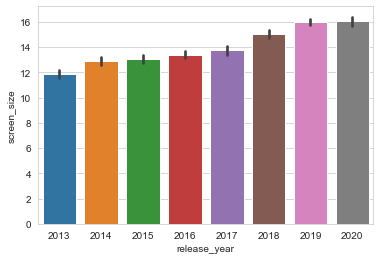

In [760]:
sns.barplot(data = df, x= 'release_year', y='screen_size')
plt.show()

**Observations**
* Screen size has increase each year
* 2019 and 2020 are very close together in average screen size

#### Analysis of Main Camera vs Selfie Camera

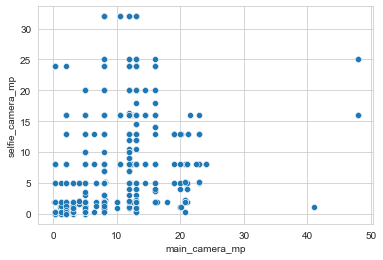

In [761]:
sns.scatterplot(data=df, x='main_camera_mp', y='selfie_camera_mp')
plt.show()

**Observations**
* There is a positive correlation between main camera and selfie camera
* There are some devices which have large main cameras but small selfie camera and vice versa

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Feature Engineering

In [762]:
# Create new column for used price divided by new price
df['used_new_price_%'] = df['used_price'] / df['new_price']
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       14.500  yes   no          13.000   
1      Honor  Android       17.300  yes  yes          13.000   
2      Honor  Android       16.690  yes  yes          13.000   
3      Honor  Android       25.500  yes  yes          13.000   
4      Honor  Android       15.320  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 3.000 3020.000 146.000          2020   
1            16.000     128.000 8.000 4300.000 213.000          2020   
2             8.000     128.000 8.000 4200.000 213.000          2020   
3             8.000      64.000 6.000 7250.000 480.000          2020   
4             8.000      64.000 3.000 5000.000 185.000          2020   

   days_used  new_price  used_price  used_price_log price_category  \
0        127    111.620      74.260           4.308         Budget   
1        325    249.390     174.530           5.162            Mid   
2        162    359.470     165.850           5.111            Mid   
3        345    278.930     169.930           5.135            Mid   
4        293    140.870      80.640           4.390         Budget   

   used_new_price_%  
0             0.665  
1             0.700  
2             0.461  
3             0.609  
4             0.572

### EDA

- It is a good idea to explore the data once again after manipulating it.

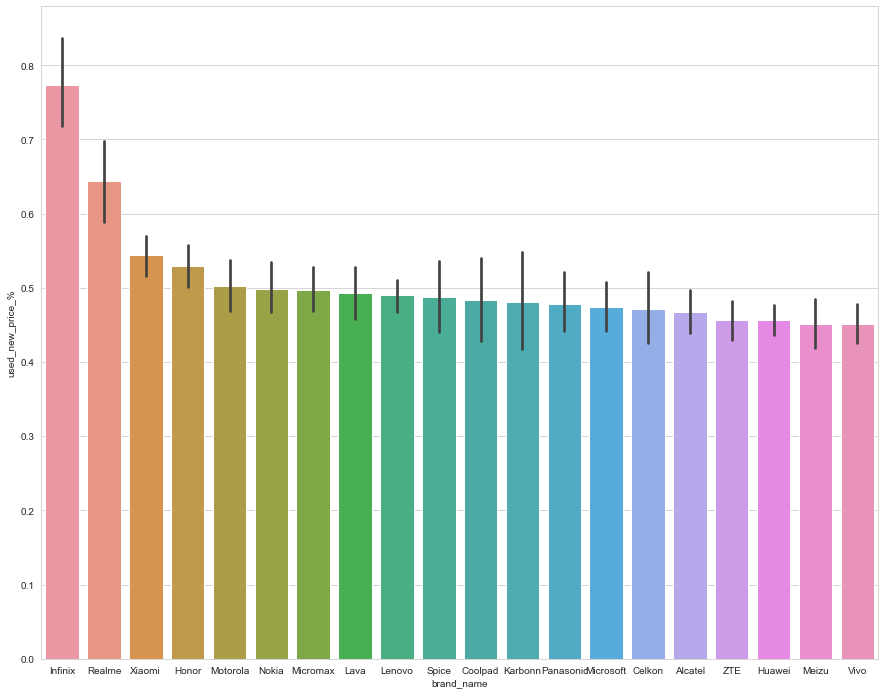

In [763]:
plt.figure(figsize=(15,12))
sns.barplot(data=df, x='brand_name', y='used_new_price_%', order=df.groupby(['brand_name'])['used_new_price_%'].mean().sort_values(ascending=False).iloc[:20].index)
plt.show()

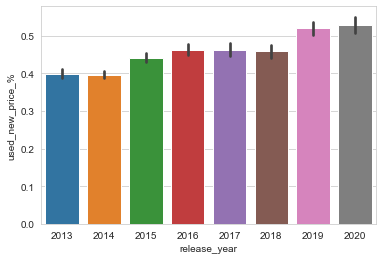

In [764]:
sns.barplot(data=df, x='release_year', y='used_new_price_%')
plt.show()

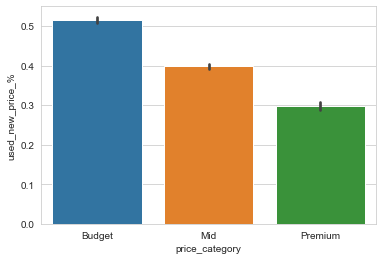

In [765]:
sns.barplot(data=df, x='price_category', y='used_new_price_%')
plt.show()

In [766]:
pd.crosstab(df['price_category'], df['release_year'], normalize='index')

release_year    2013  2014  2015  2016  2017  2018  2019  2020
price_category                                                
Budget         0.211 0.210 0.162 0.112 0.076 0.064 0.100 0.064
Mid            0.136 0.182 0.160 0.120 0.098 0.106 0.130 0.069
Premium        0.043 0.090 0.064 0.083 0.100 0.185 0.254 0.182

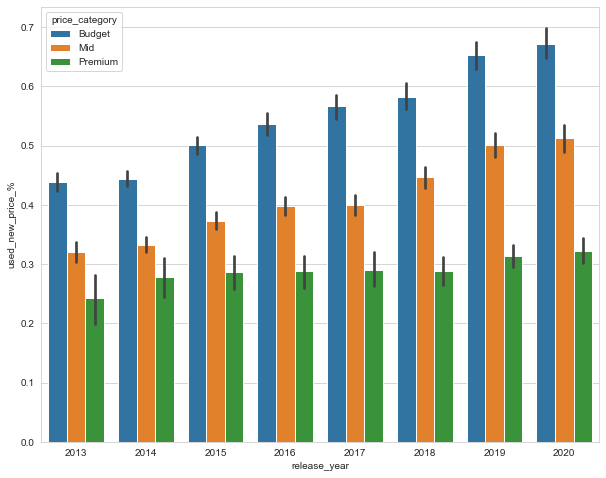

In [767]:
plt.figure(figsize=(10,8))
sns.barplot(data = df, x='release_year', y='used_new_price_%', hue='price_category')
plt.show()

**Observations**
* The phones which have the highest price percentage between Used to New is Infinix, Realme and Xiaomi
* Newer phones hold their value better than older ones for used price which is what we would expect
* Budget phones hold their value better than Mid and Premium phones
* Year over Year budget phones hold their value more than mid and premium phones

### Missing Value Treatment

In [768]:
df1 = df.copy()

In [769]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
price_category        0
used_new_price_%      0
dtype: int64

In [770]:
# Fill in N/A values with the median
null_columns = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

for column in null_columns:
    df1[column] = df1.groupby('brand_name')[column].transform(lambda x: x.fillna(x.median()))

In [771]:
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
price_category       0
used_new_price_%     0
dtype: int64

In [772]:
# Fill in the remaining N/A values for main_camera_mp
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
price_category      0
used_new_price_%    0
dtype: int64

In [773]:
df.describe(include='all').T

count unique      top  freq     mean      std      min  \
brand_name           3454     34   Others   502      NaN      NaN      NaN   
os                   3454      4  Android  3214      NaN      NaN      NaN   
screen_size      3454.000    NaN      NaN   NaN   13.713    3.805    5.080   
4g                   3454      2      yes  2335      NaN      NaN      NaN   
5g                   3454      2       no  3302      NaN      NaN      NaN   
main_camera_mp   3275.000    NaN      NaN   NaN    9.460    4.815    0.080   
selfie_camera_mp 3452.000    NaN      NaN   NaN    6.554    6.970    0.000   
int_memory       3450.000    NaN      NaN   NaN   54.573   84.972    0.010   
ram              3450.000    NaN      NaN   NaN    4.036    1.365    0.020   
battery          3448.000    NaN      NaN   NaN 3133.403 1299.683  500.000   
weight           3447.000    NaN      NaN   NaN  182.752   88.413   69.000   
release_year     3454.000    NaN      NaN   NaN 2015.965    2.298 2013.000   
days_used        3454.000    NaN      NaN   NaN  674.870  248.580   91.000   
new_price        3454.000    NaN      NaN   NaN  237.039  194.303   18.200   
used_price       3454.000    NaN      NaN   NaN   92.303   54.702    4.650   
used_price_log   3454.000    NaN      NaN   NaN    4.365    0.589    1.537   
price_category       3454      3   Budget  1844      NaN      NaN      NaN   
used_new_price_% 3454.000    NaN      NaN   NaN    0.449    0.161    0.088   

                      25%      50%      75%      max  
brand_name            NaN      NaN      NaN      NaN  
os                    NaN      NaN      NaN      NaN  
screen_size        12.700   12.830   15.340   30.710  
4g                    NaN      NaN      NaN      NaN  
5g                    NaN      NaN      NaN      NaN  
main_camera_mp      5.000    8.000   13.000   48.000  
selfie_camera_mp    2.000    5.000    8.000   32.000  
int_memory         16.000   32.000   64.000 1024.000  
ram                 4.000    4.000    4.000   12.000  
battery          2100.000 3000.000 4000.000 9720.000  
weight            142.000  160.000  185.000  855.000  
release_year     2014.000 2015.500 2018.000 2020.000  
days_used         533.500  690.500  868.750 1094.000  
new_price         120.343  189.785  291.115 2560.200  
used_price         56.483   81.870  116.245  749.520  
used_price_log      4.034    4.405    4.756    6.619  
price_category        NaN      NaN      NaN      NaN  
used_new_price_%    0.336    0.429    0.545    0.984

### Outlier Detection

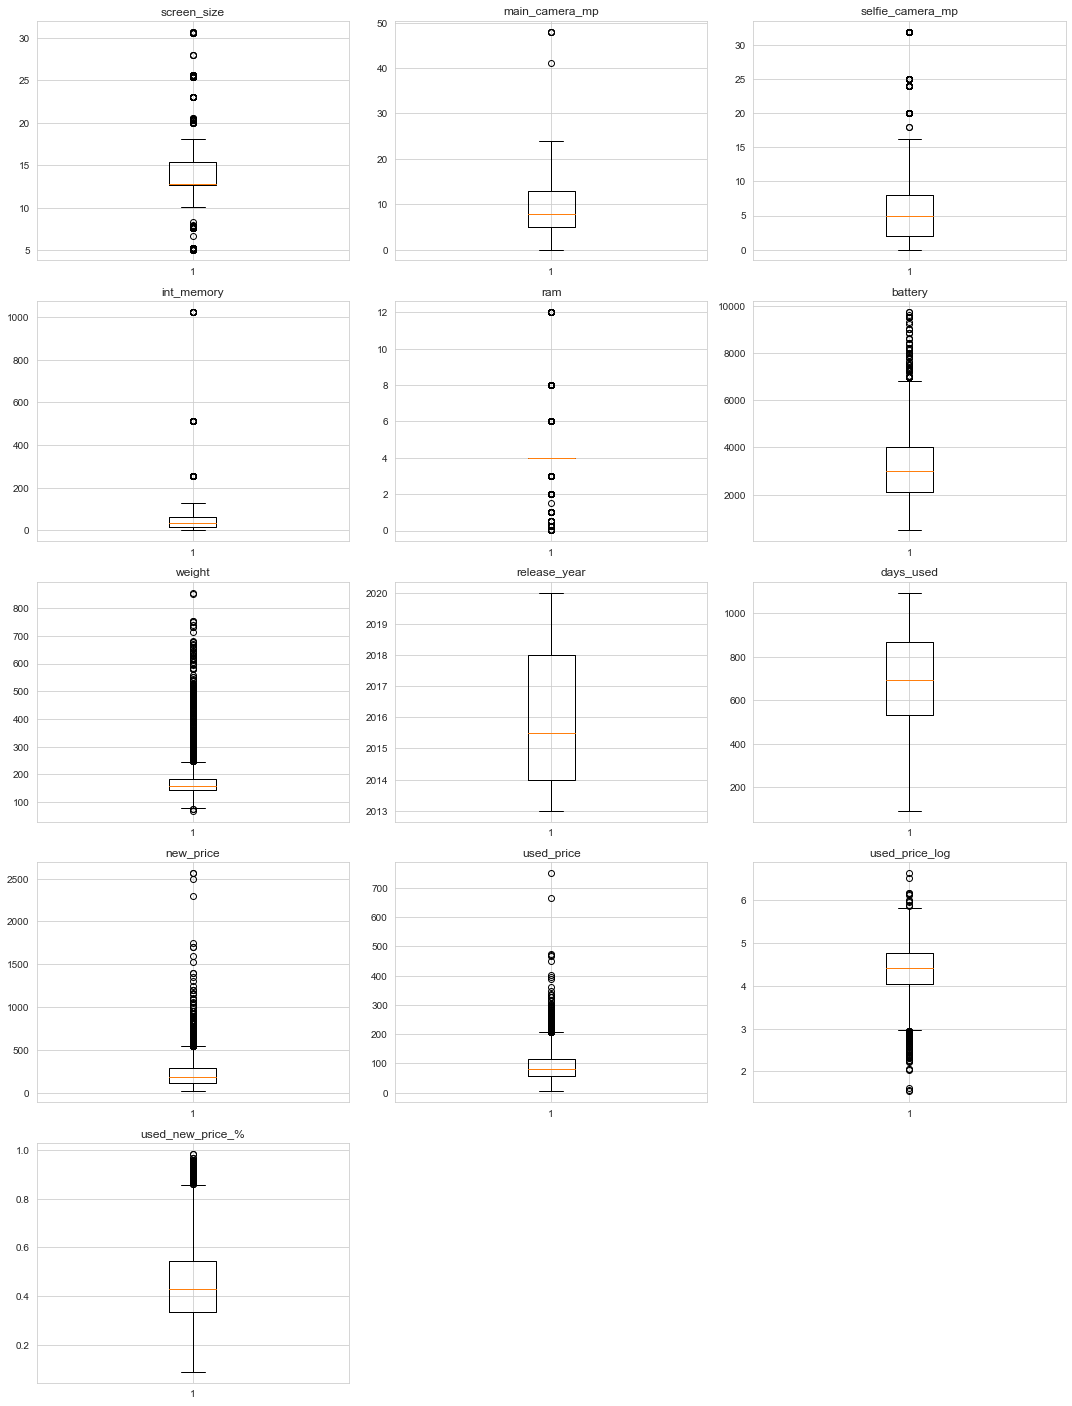

In [774]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Building a Linear Regression model

In [775]:
# We have to convert anything that is an object into a dummy variable
df1.dtypes

brand_name            object
os                    object
screen_size          float64
4g                    object
5g                    object
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
used_price_log       float64
price_category      category
used_new_price_%     float64
dtype: object

In [776]:
df1 = pd.get_dummies(df1, columns = ['brand_name','os','4g','5g','price_category'], drop_first=True)
df1.columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price',
       'used_price', 'used_price_log', 'used_new_price_%',
       'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',
       'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
       'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
       'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
       'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others',
       'os_Win

In [777]:
# Drop price columns and prices which we are trying to predict
# Use used_price_log as dependent variable instead of used_price because used_price_log has the data as more normal

x = df1.drop(['used_price', 'used_price_log', 'new_price', 'used_new_price_%'], axis=1)
y = df1['used_price_log']

In [778]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [779]:
x_train.shape

(2417, 49)

In [780]:
x_test.shape

(1037, 49)

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Assumptions for Linear Regression Model:**
* No Multicollinearity
* Linearity of variables
* Independence of error terms
* Normality of error terms
* No Heteroscedasticity

In [781]:
# Add constants

x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)

olsmod = sm.OLS(y_train, x_train1)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     183.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:11   Log-Likelihood:                -234.62
No. Observations:                2417   AIC:                             569.2
Df Residuals:                    2367   BIC:                             858.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

#### Test for Multicollinearity

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [782]:
# Check VIF of the predictors
# Add option to display scientific notation as full number with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)

vif_series1


const                    3767535.060
screen_size                    7.607
main_camera_mp                 2.153
selfie_camera_mp               2.848
int_memory                     1.372
ram                            2.176
battery                        4.093
weight                         6.447
release_year                   4.881
days_used                      2.660
brand_name_Alcatel             3.406
brand_name_Apple              12.997
brand_name_Asus                3.332
brand_name_BlackBerry          1.628
brand_name_Celkon              1.763
brand_name_Coolpad             1.468
brand_name_Gionee              1.952
brand_name_Google              1.321
brand_name_HTC                 3.412
brand_name_Honor               3.340
brand_name_Huawei              5.983
brand_name_Infinix             1.284
brand_name_Karbonn             1.571
brand_name_LG                  4.845
brand_name_Lava                1.710
brand_name_Lenovo              4.563
brand_name_Meizu               2.180
b

In [783]:
# Drop brand_name_apple which has the highest VIF besides the constant
# R-squared and Adjusted R-squared have no difference
x_train2 = x_train1.drop(["brand_name_Apple"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.791 
Adjusted R-squared: 0.787


In [784]:
# Check VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index=x_train2.columns,
)

vif_series2

const                    3765744.181
screen_size                    7.562
main_camera_mp                 2.149
selfie_camera_mp               2.833
int_memory                     1.372
ram                            2.164
battery                        4.090
weight                         6.444
release_year                   4.879
days_used                      2.660
brand_name_Alcatel             3.227
brand_name_Asus                3.147
brand_name_BlackBerry          1.559
brand_name_Celkon              1.717
brand_name_Coolpad             1.435
brand_name_Gionee              1.887
brand_name_Google              1.294
brand_name_HTC                 3.246
brand_name_Honor               3.155
brand_name_Huawei              5.582
brand_name_Infinix             1.264
brand_name_Karbonn             1.540
brand_name_LG                  4.566
brand_name_Lava                1.667
brand_name_Lenovo              4.289
brand_name_Meizu               2.092
brand_name_Micromax            3.184
b

In [785]:
# Try removing brand_name_others since it's almost 10 VIF

x_train3 = x_train2.drop(["brand_name_Others"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)



R-squared: 0.791 
Adjusted R-squared: 0.787


In [786]:
# No change in R-squared and adjusted R-squared

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])],
    index=x_train3.columns,
)

vif_series3

const                    3765301.809
screen_size                    7.485
main_camera_mp                 2.148
selfie_camera_mp               2.832
int_memory                     1.371
ram                            2.160
battery                        4.089
weight                         6.418
release_year                   4.878
days_used                      2.659
brand_name_Alcatel             1.217
brand_name_Asus                1.201
brand_name_BlackBerry          1.121
brand_name_Celkon              1.163
brand_name_Coolpad             1.053
brand_name_Gionee              1.091
brand_name_Google              1.043
brand_name_HTC                 1.223
brand_name_Honor               1.281
brand_name_Huawei              1.502
brand_name_Infinix             1.062
brand_name_Karbonn             1.071
brand_name_LG                  1.340
brand_name_Lava                1.069
brand_name_Lenovo              1.302
brand_name_Meizu               1.135
brand_name_Micromax            1.207
b

**Observations**
* No variables are above or close to 10 VIF
* We have satisfied Multicollinearity and can move on to next step

#### Linearity of Variables
* Check P-Values of each variable

In [787]:
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     190.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:30   Log-Likelihood:                -236.61
No. Observations:                2417   AIC:                             569.2
Df Residuals:                    2369   BIC:                             847.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

**Observations**
* brand_name_Karbonn has a p-value of .9, we will remove this and re-run the regression

In [788]:
x_train4 = x_train3.drop(["brand_name_Karbonn"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     195.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:33   Log-Likelihood:                -236.62
No. Observations:                2417   AIC:                             567.2
Df Residuals:                    2370   BIC:                             839.4
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_Name_XOLO

In [789]:
x_train5 = x_train4.drop(["brand_name_XOLO"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train5)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:36   Log-Likelihood:                -236.62
No. Observations:                2417   AIC:                             565.2
Df Residuals:                    2371   BIC:                             831.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is os_Windows

In [790]:
x_train6 = x_train5.drop(["os_Windows"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train6)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     204.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:40   Log-Likelihood:                -236.63
No. Observations:                2417   AIC:                             563.3
Df Residuals:                    2372   BIC:                             823.8
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Honor

In [791]:
x_train7 = x_train6.drop(["brand_name_Honor"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train7)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:44   Log-Likelihood:                -236.65
No. Observations:                2417   AIC:                             561.3
Df Residuals:                    2373   BIC:                             816.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is release_year

In [792]:
x_train8 = x_train7.drop(["release_year"], axis=1)
olsmod_7 = sm.OLS(y_train, x_train8)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     213.9
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:48   Log-Likelihood:                -236.71
No. Observations:                2417   AIC:                             559.4
Df Residuals:                    2374   BIC:                             808.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Alcatel

In [793]:
x_train9 = x_train8.drop(["brand_name_Alcatel"], axis=1)
olsmod_8 = sm.OLS(y_train, x_train9)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:52   Log-Likelihood:                -236.77
No. Observations:                2417   AIC:                             557.5
Df Residuals:                    2375   BIC:                             800.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Coolpad

In [794]:
x_train10 = x_train9.drop(["brand_name_Coolpad"], axis=1)
olsmod_9 = sm.OLS(y_train, x_train10)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:56   Log-Likelihood:                -236.83
No. Observations:                2417   AIC:                             555.7
Df Residuals:                    2376   BIC:                             793.1
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Lava

In [795]:
x_train11 = x_train10.drop(["brand_name_Lava"], axis=1)
olsmod_10 = sm.OLS(y_train, x_train11)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     230.6
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:53:59   Log-Likelihood:                -236.96
No. Observations:                2417   AIC:                             553.9
Df Residuals:                    2377   BIC:                             785.5
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* Slight increase in adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Sony

In [796]:
x_train12 = x_train11.drop(["brand_name_Sony"], axis=1)
olsmod_11 = sm.OLS(y_train, x_train12)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     236.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:02   Log-Likelihood:                -237.22
No. Observations:                2417   AIC:                             552.4
Df Residuals:                    2378   BIC:                             778.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Vivo

In [797]:
x_train13 = x_train12.drop(["brand_name_Vivo"], axis=1)
olsmod_12 = sm.OLS(y_train, x_train13)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     243.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:08   Log-Likelihood:                -237.44
No. Observations:                2417   AIC:                             550.9
Df Residuals:                    2379   BIC:                             770.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Meizu

In [798]:
x_train14 = x_train13.drop(["brand_name_Meizu"], axis=1)
olsmod_13 = sm.OLS(y_train, x_train14)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     249.9
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:18   Log-Likelihood:                -237.62
No. Observations:                2417   AIC:                             549.2
Df Residuals:                    2380   BIC:                             763.5
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Microsoft

In [799]:
x_train15 = x_train14.drop(["brand_name_Microsoft"], axis=1)
olsmod_14 = sm.OLS(y_train, x_train15)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     257.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:26   Log-Likelihood:                -237.98
No. Observations:                2417   AIC:                             548.0
Df Residuals:                    2381   BIC:                             756.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Motorola

In [800]:
x_train16 = x_train15.drop(["brand_name_Motorola"], axis=1)
olsmod_15 = sm.OLS(y_train, x_train16)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     264.6
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:29   Log-Likelihood:                -238.41
No. Observations:                2417   AIC:                             546.8
Df Residuals:                    2382   BIC:                             749.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Realme

In [801]:
x_train17 = x_train16.drop(["brand_name_Realme"], axis=1)
olsmod_16 = sm.OLS(y_train, x_train17)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     272.6
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:32   Log-Likelihood:                -238.80
No. Observations:                2417   AIC:                             545.6
Df Residuals:                    2383   BIC:                             742.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_ZTE

In [802]:
x_train18 = x_train17.drop(["brand_name_ZTE"], axis=1)
olsmod_17 = sm.OLS(y_train, x_train18)
olsres_17 = olsmod_17.fit()
print(olsres_17.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     281.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:37   Log-Likelihood:                -239.31
No. Observations:                2417   AIC:                             544.6
Df Residuals:                    2384   BIC:                             735.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is battery

In [803]:
x_train19 = x_train18.drop(["battery"], axis=1)
olsmod_18 = sm.OLS(y_train, x_train19)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     290.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:40   Log-Likelihood:                -239.87
No. Observations:                2417   AIC:                             543.7
Df Residuals:                    2385   BIC:                             729.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* R-Squarred went down slightly but no change in adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Infinix

In [804]:
x_train20 = x_train19.drop(["brand_name_Infinix"], axis=1)
olsmod_19 = sm.OLS(y_train, x_train20)
olsres_19 = olsmod_19.fit()
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     299.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:43   Log-Likelihood:                -240.36
No. Observations:                2417   AIC:                             542.7
Df Residuals:                    2386   BIC:                             722.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is 5g_yes

In [805]:
x_train21 = x_train20.drop(['5g_yes'], axis=1)
olsmod_20 = sm.OLS(y_train, x_train21)
olsres_20 = olsmod_20.fit()
print(olsres_20.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     310.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:46   Log-Likelihood:                -240.99
No. Observations:                2417   AIC:                             542.0
Df Residuals:                    2387   BIC:                             715.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Panasonic

In [806]:
x_train22 = x_train21.drop(['brand_name_Panasonic'], axis=1)
olsmod_21 = sm.OLS(y_train, x_train22)
olsres_21= olsmod_21.fit()
print(olsres_21.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     321.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:49   Log-Likelihood:                -241.64
No. Observations:                2417   AIC:                             541.3
Df Residuals:                    2388   BIC:                             709.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Oppo

In [807]:
x_train23 = x_train22.drop(['brand_name_Oppo'], axis=1)
olsmod_22 = sm.OLS(y_train, x_train23)
olsres_22 = olsmod_22.fit()
print(olsres_22.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     332.9
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:52   Log-Likelihood:                -242.25
No. Observations:                2417   AIC:                             540.5
Df Residuals:                    2389   BIC:                             702.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Google

In [808]:
x_train24 = x_train23.drop(['brand_name_Google'], axis=1)
olsmod_23 = sm.OLS(y_train, x_train24)
olsres_23 = olsmod_23.fit()
print(olsres_23.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     345.5
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:54   Log-Likelihood:                -243.05
No. Observations:                2417   AIC:                             540.1
Df Residuals:                    2390   BIC:                             696.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Huawei

In [809]:
x_train25 = x_train24.drop(['brand_name_Huawei'], axis=1)
olsmod_24 = sm.OLS(y_train, x_train25)
olsres_24 = olsmod_24.fit()
print(olsres_24.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     359.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:57   Log-Likelihood:                -243.79
No. Observations:                2417   AIC:                             539.6
Df Residuals:                    2391   BIC:                             690.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Samsung

In [810]:
x_train26 = x_train25.drop(['brand_name_Samsung'], axis=1)
olsmod_25 = sm.OLS(y_train, x_train26)
olsres_25 = olsmod_25.fit()
print(olsres_25.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     374.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:59   Log-Likelihood:                -244.45
No. Observations:                2417   AIC:                             538.9
Df Residuals:                    2392   BIC:                             683.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_OnePlus

In [811]:
x_train27 = x_train26.drop(['brand_name_OnePlus'], axis=1)
olsmod_26 = sm.OLS(y_train, x_train27)
olsres_26 = olsmod_26.fit()
print(olsres_26.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     390.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:01   Log-Likelihood:                -245.08
No. Observations:                2417   AIC:                             538.2
Df Residuals:                    2393   BIC:                             677.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred and a slight change in adjusted r-squared, but not significant
* We will remove this field and try removing the next highest which is brand_name_HTC

In [812]:
x_train28 = x_train27.drop(['brand_name_HTC'], axis=1)
olsmod_27 = sm.OLS(y_train, x_train28)
olsres_27 = olsmod_27.fit()
print(olsres_27.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     407.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:04   Log-Likelihood:                -245.80
No. Observations:                2417   AIC:                             537.6
Df Residuals:                    2394   BIC:                             670.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* Slight change in R-squarred and no change in adjusted r-squared, but not significant enough to keep
* We will remove this field and try removing the next highest which is brand_name_Asus

In [813]:
x_train29 = x_train28.drop(['brand_name_Asus'], axis=1)
olsmod_28 = sm.OLS(y_train, x_train29)
olsres_28 = olsmod_28.fit()
print(olsres_28.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     427.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:07   Log-Likelihood:                -246.50
No. Observations:                2417   AIC:                             537.0
Df Residuals:                    2395   BIC:                             664.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Lenovo

In [814]:
x_train30 = x_train29.drop(['brand_name_Lenovo'], axis=1)
olsmod_29 = sm.OLS(y_train, x_train30)
olsres_29 = olsmod_29.fit()
print(olsres_29.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     448.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:09   Log-Likelihood:                -247.21
No. Observations:                2417   AIC:                             536.4
Df Residuals:                    2396   BIC:                             658.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_LG

In [815]:
x_train31 = x_train30.drop(['brand_name_LG'], axis=1)
olsmod_30 = sm.OLS(y_train, x_train31)
olsres_30 = olsmod_30.fit()
print(olsres_30.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:11   Log-Likelihood:                -247.91
No. Observations:                2417   AIC:                             535.8
Df Residuals:                    2397   BIC:                             651.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_BlackBerry

In [816]:
x_train32 = x_train31.drop(['brand_name_BlackBerry'], axis=1)
olsmod_31 = sm.OLS(y_train, x_train32)
olsres_31 = olsmod_31.fit()
print(olsres_31.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     497.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:13   Log-Likelihood:                -248.66
No. Observations:                2417   AIC:                             535.3
Df Residuals:                    2398   BIC:                             645.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Gionee

In [817]:
x_train33 = x_train32.drop(['brand_name_Gionee'], axis=1)
olsmod_32 = sm.OLS(y_train, x_train33)
olsres_32 = olsmod_32.fit()
print(olsres_32.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     526.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:15   Log-Likelihood:                -249.59
No. Observations:                2417   AIC:                             535.2
Df Residuals:                    2399   BIC:                             639.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is brand_name_Xiaomi

In [818]:
x_train34 = x_train33.drop(['brand_name_Xiaomi'], axis=1)
olsmod_33 = sm.OLS(y_train, x_train34)
olsres_33 = olsmod_33.fit()
print(olsres_33.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     559.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:17   Log-Likelihood:                -250.60
No. Observations:                2417   AIC:                             535.2
Df Residuals:                    2400   BIC:                             633.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* No change in R-squarred or adjusted R-squarred
* We will remove this field and try removing the next highest which is days_used

In [819]:
x_train35 = x_train34.drop(['days_used'], axis=1)
olsmod_34 = sm.OLS(y_train, x_train35)
olsres_34 = olsmod_34.fit()
print(olsres_34.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     595.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:19   Log-Likelihood:                -252.49
No. Observations:                2417   AIC:                             537.0
Df Residuals:                    2401   BIC:                             629.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

**Observations**
* Slight decrease in R-squarred and no change in adjusted R-squarred
* We will keep this field removed and won't remove any other fields since no others have a p-value above 0.05

#### Linearity and Independence

In [820]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_34.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_34.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0          4.087          3.840      0.247
1          4.448          4.665     -0.217
2          4.315          4.203      0.112
3          4.282          4.125      0.157
4          4.456          4.493     -0.036

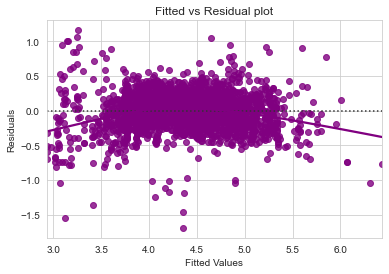

In [821]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**
* I am not observing a pattern in the data, it looks randomly distributed

#### Normality

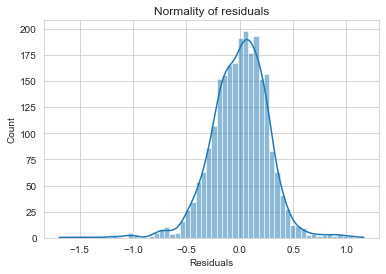

In [822]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**
* The residual terms look normally distributed

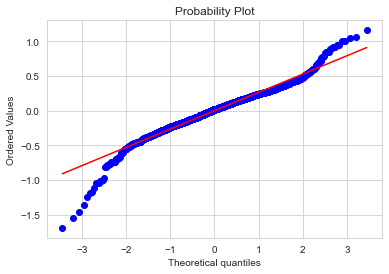

In [823]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**
* Most of the points are on the straight line of the QQ plot

#### Homoscedasticity

In [824]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train34)
lzip(name, test)

[('F statistic', 1.0533898326726359), ('p-value', 0.18473298393506601)]

**Observations**
* P-value is greater than 0.05 so we can say the residuals are homoscedastic

## Model performance evaluation

In [825]:
print(olsres_34.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     595.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:36   Log-Likelihood:                -252.49
No. Observations:                2417   AIC:                             537.0
Df Residuals:                    2401   BIC:                             629.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [826]:
Equation = "used price ="
print(Equation, end=" ")
for i in range(len(x_train35.columns)):
    if i == 0:
        print(olsres_34.params[i], "+", end=" ")
    elif i != len(x_train35.columns) - 1:
        print(
            olsres_34.params[i],
            "* (",
            x_train35.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_34.params[i], "* (", x_train35.columns[i], ")")

used price = 2.897228259149452 + 0.03552635678655474 * ( screen_size ) +  0.03135238486942326 * ( main_camera_mp ) +  0.016181247360301302 * ( selfie_camera_mp ) +  0.000359867533748033 * ( int_memory ) +  0.051360517628677896 * ( ram ) +  0.0009231078383899969 * ( weight ) +  -0.2018548447380931 * ( brand_name_Celkon ) +  -0.1562534630001212 * ( brand_name_Micromax ) +  0.10606757866264634 * ( brand_name_Nokia ) +  -0.14617085332564977 * ( brand_name_Spice ) +  -0.22381505704412724 * ( os_Others ) +  0.10550911710088032 * ( os_iOS ) +  0.11242266107789095 * ( 4g_yes ) +  0.19765426977638745 * ( price_category_Mid ) +  0.4045265367995159 * ( price_category_Premium )


## Final Model Summary

In [827]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [828]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train35).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     595.7
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:52   Log-Likelihood:                -252.49
No. Observations:                2417   AIC:                             537.0
Df Residuals:                    2401   BIC:                             629.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [829]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train35, y_train)
olsmodel_train_perf

Training Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE
0 0.269 0.203      0.788           0.787 4.917

In [830]:
# Remove columns from test data that we removed from training data
x_test2 = x_test1.drop(['battery','release_year','days_used','brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
                       'brand_name_BlackBerry', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
                       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
                       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
                       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
                       'os_Windows', '5g_yes'], axis=1)

In [831]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test2, y_test)
olsmodel_test_perf

Test Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE
0 0.277 0.207      0.787           0.784 5.135

## Actionable Insights and Recommendations

**Observations**
* The train and test  $R^2$ are 0.788 and 0.787, indicating that the model explains 78.8% and 78.7% of the total variation in the train and test sets respectively. Also, both scares are comparible

* RMSE values on the train and test sets are comparable

* These show that the model is not overfitting

* MAE indicates that our current model is able to predict used_device prices within a mean error of 0.2 on the test set

* MAPE of 5.135 on the test data means that we are able to predict within 5% of the used device price

**Recommendations**
* We use the variables: 
       'const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'weight', 'brand_name_Celkon',
       'brand_name_Micromax', 'brand_name_Nokia', 'brand_name_Spice',
       'os_Others', 'os_iOS', '4g_yes', 'price_category_Mid',
       'price_category_Premium'
       
* The other columns in the dataset are not important for building a model and can be removed
* Based on our model they can predict almost 79% of the used device price
